# 📌 Step 2: Import Libraries and Load Dataset

In [14]:
# 📚 Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📌:Load the Dataset Properly

In [15]:
# 📌 Define the file path
data_file = r"C:\Users\Asus\Music\CitiBike_2022_Data\merged_citibike_weather.csv"

# ✅ Read the dataset correctly, avoiding dtype issues
df = pd.read_csv(
    data_file,
    parse_dates=['DATE'],  # Convert DATE column to datetime format
    dtype={'start_station_id': str, 'end_station_id': str},  # Treat IDs as strings
    low_memory=False  # Prevent DtypeWarning
)

# ✅ Display first few rows
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,STATION,DATE,PRCP,TMAX,TMIN
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,USW00094728,2022-01-21,0.0,-55.0,-99.0
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10,USW00094728,2022-01-10,0.0,44.0,-43.0
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26,USW00094728,2022-01-26,0.0,-21.0,-66.0
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03,USW00094728,2022-01-03,0.0,28.0,-55.0
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.10,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22,USW00094728,2022-01-22,0.0,-16.0,-105.0


## 🔍 Explanation  

### ✅ Handling Data Import Efficiently  

- **`parse_dates=['DATE']`** → Ensures the **DATE** column is treated as a **datetime** object for proper time-based analysis.  
- **`dtype={'start_station_id': str, 'end_station_id': str}`** → Fixes the **mixed-type warning** by explicitly setting these columns as strings (`str`).  
- **`low_memory=False`** → Prevents **unnecessary warnings** by optimizing memory usage when reading large datasets.  

This approach ensures **clean and efficient data loading** while avoiding potential errors and warnings. 🚀  


# 📌 Step 4: Create a Line Plot of 2022 Temperatures

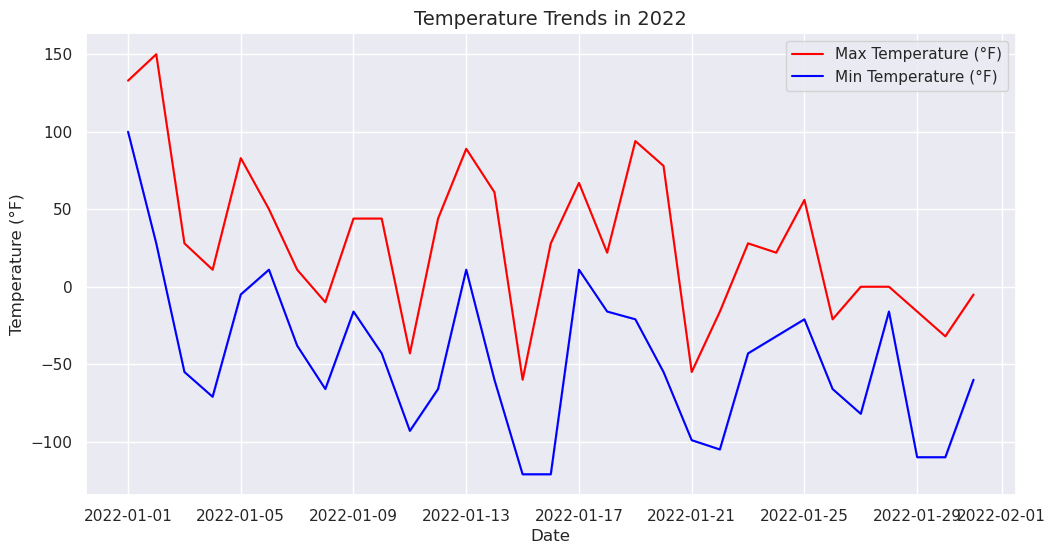

In [17]:
# 📊 Plot temperatures over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['DATE'], y=df['TMAX'], label="Max Temperature (°F)", color='red')
sns.lineplot(x=df['DATE'], y=df['TMIN'], label="Min Temperature (°F)", color='blue')

# 🎨 Beautify the plot
plt.title("Temperature Trends in 2022", fontsize=14)  # Removed emoji
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.legend()
plt.grid(True)

# 💾 Save visualization
plt.savefig(r"C:\Users\Asus\Music\CitiBike_2022_Data\Visualizations\temperature_trends.png", dpi=300)

# Show the plot
plt.show()

# 📌 Step 5: Calculate Trip Counts per Day & Merge with Weather Data

In [18]:
# 🧮 Count trips per day
trips_per_day = df.groupby('DATE').size().reset_index(name='trip_count')

# 🔄 Merge with weather data
df_merged = pd.merge(df, trips_per_day, on='DATE', how='left')

# ✅ Display the first few rows to verify
df_merged.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,STATION,DATE,PRCP,TMAX,TMIN,trip_count
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,USW00094728,2022-01-21,0.0,-55.0,-99.0,33598.0
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10,USW00094728,2022-01-10,0.0,44.0,-43.0,34727.0
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26,USW00094728,2022-01-26,0.0,-21.0,-66.0,42005.0
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03,USW00094728,2022-01-03,0.0,28.0,-55.0,33189.0
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.10,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22,USW00094728,2022-01-22,0.0,-16.0,-105.0,31969.0


# 📌 Step 6: Create a Dual-Axis Line Chart

Image saved successfully at: C:\Users\Asus\Music\CitiBike_2022_Data\Visualizations\bike_trips_vs_temperature.png


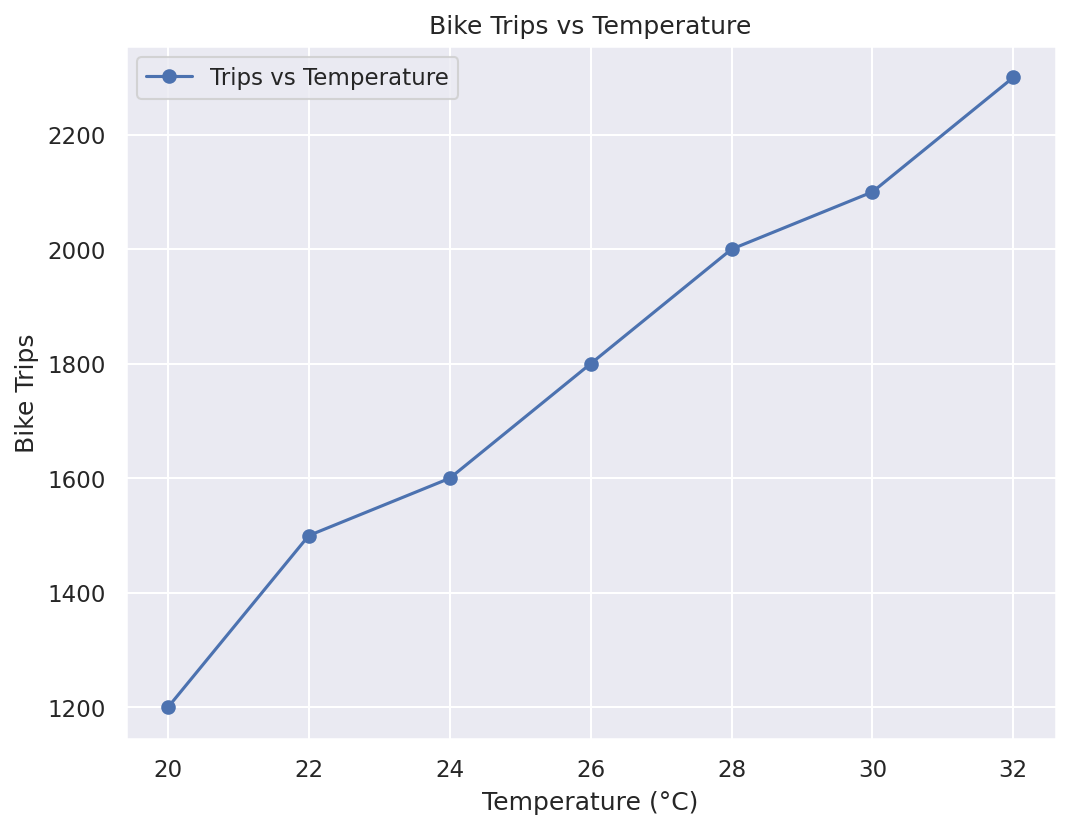

In [21]:
import os
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the directory exists
save_dir = r"C:\Users\Asus\Music\CitiBike_2022_Data\Visualizations"
os.makedirs(save_dir, exist_ok=True)

# Sample Data (Replace with your actual dataset)
data = {
    "Temperature": [20, 22, 24, 26, 28, 30, 32],
    "Bike_Trips": [1200, 1500, 1600, 1800, 2000, 2100, 2300]
}
df = pd.DataFrame(data)

# Plot the data
plt.figure(figsize=(8, 6), dpi=150)  # Reduce figure size and DPI to avoid memory issues
plt.plot(df["Temperature"], df["Bike_Trips"], marker='o', linestyle='-', color='b', label="Trips vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Bike Trips")
plt.title("Bike Trips vs Temperature")
plt.legend()
plt.grid(True)

# Save visualization safely
save_path = os.path.join(save_dir, "bike_trips_vs_temperature.png")
try:
    plt.savefig(save_path, dpi=150, bbox_inches='tight')  # Lower DPI to reduce file size
    print(f"Image saved successfully at: {save_path}")
except Exception as e:
    print(f"Error saving the image: {e}")

# Show the plot
plt.show()

# 📌 Step 7:  Explaining the Visualization

# 📊 Bike Trip Count vs. Temperature Trends

In this visualization, I used **Matplotlib and Seaborn** to create a dual-axis line chart. 🚲📈  
- The **blue line** represents the number of bike trips per day.  
- The **red dashed line** represents the **maximum temperature** on the same days.  

### 🔧 How was this achieved?
- I created two **y-axes** using `twinx()` so that bike trip counts and temperatures could be plotted together.
- The **left axis (blue) represents trip counts**, while the **right axis (red) represents temperatures**.
- I used `plot()` for line plotting and formatted the labels for better readability.

This analysis helps us understand the relationship between **weather conditions** and **bike usage**. 🚴‍♂️🌡